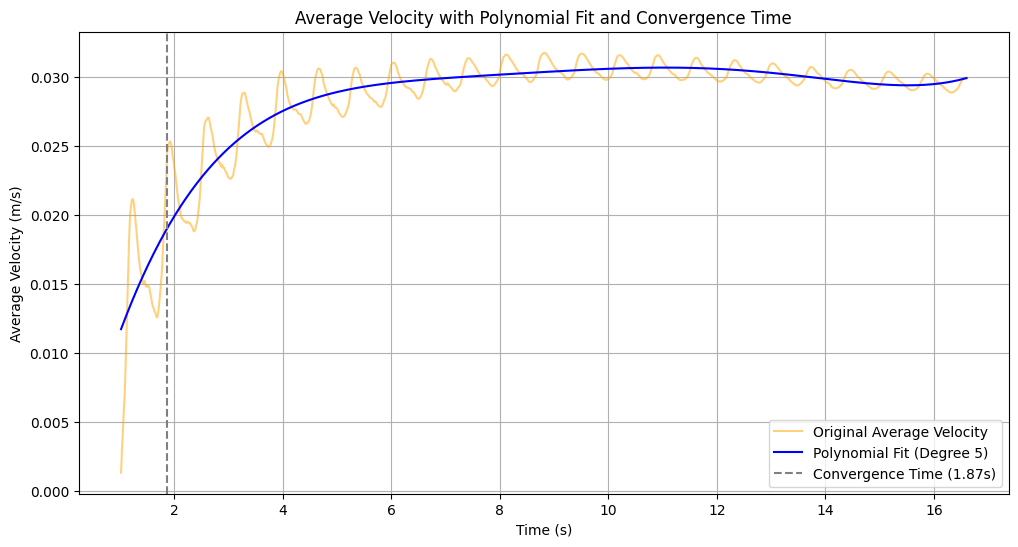

The system reaches 1 - 1/e of the maximum average velocity (0.0189 m/s) at t = 1.87 seconds.
The coasting # is: 1.54


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60, start_time=1, end_time=35, poly_degree=2):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # Crop the data based on the start and end times
    start_index = int(start_time * fps)
    end_index = int(end_time * fps)
    time = time[start_index:end_index]
    mean_x_position = mean_x_position[start_index:end_index]
    mean_y_position = mean_y_position[start_index:end_index]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # Polynomial fit to the average velocity
    poly_coeffs = np.polyfit(time[1:], average_velocity, poly_degree)
    poly_fit = np.polyval(poly_coeffs, time[1:])

    # Calculate the 1 - 1/e value of the maximum average velocity
    max_velocity = poly_fit[-1]  # Value at the last time point of the polynomial fit
    threshold_velocity = (1 - 1/np.e) * max_velocity  # Approximately 0.632 * max_velocity

    # Find the time where the polynomial fit meets this threshold
    threshold_index = np.where(poly_fit >= threshold_velocity)[0][0]
    convergence_time = time[1:][threshold_index]

    #
    temp_freq = 1.21
    coasting_num = convergence_time/temp_freq


    # --- Plot Original, Polynomial Fit, and Threshold ---
    plt.figure(figsize=(12, 6))
    plt.plot(time[1:], average_velocity, label='Original Average Velocity', color='orange', alpha=0.5)
    plt.plot(time[1:], poly_fit, label=f'Polynomial Fit (Degree {poly_degree})', color='blue')
    plt.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Average Velocity (m/s)')
    plt.title('Average Velocity with Polynomial Fit and Convergence Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'The system reaches 1 - 1/e of the maximum average velocity ({threshold_velocity:.4f} m/s) at t = {convergence_time:.2f} seconds.')
    print(f'The coasting # is: {coasting_num:.2f}')

# Path to the CSV file
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/24cm/24cm_run4DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv'

# Run the function with polynomial fit
analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60, poly_degree=5)


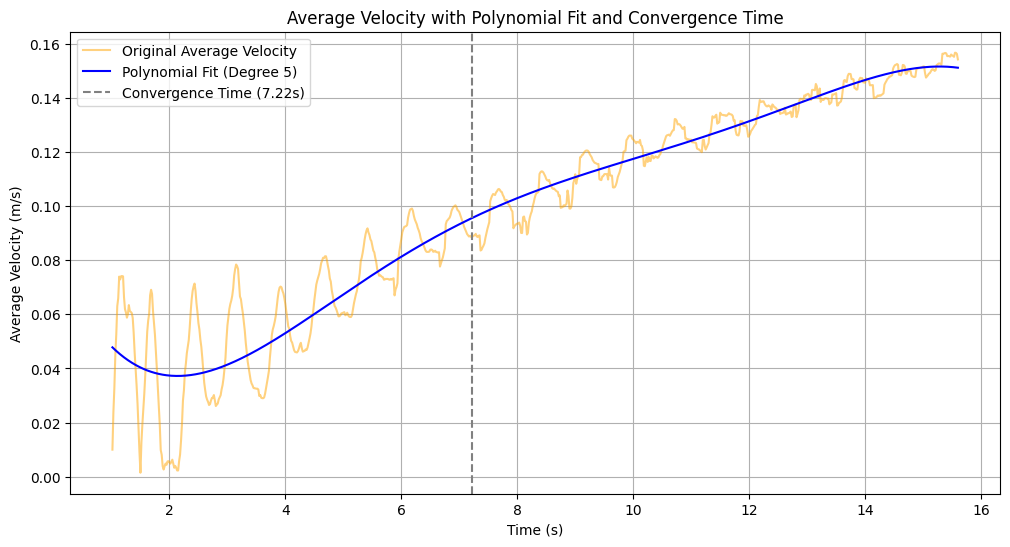

The system reaches 1 - 1/e of the maximum average velocity (0.0955 m/s) at t = 7.22 seconds.
The coasting # is: 5.96


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60, start_time=1, end_time=16, poly_degree=2):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # Crop the data based on the start and end times
    start_index = int(start_time * fps)
    end_index = int(end_time * fps)
    time = time[start_index:end_index]
    mean_x_position = mean_x_position[start_index:end_index]
    mean_y_position = mean_y_position[start_index:end_index]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # Polynomial fit to the average velocity
    poly_coeffs = np.polyfit(time[1:], average_velocity, poly_degree)
    poly_fit = np.polyval(poly_coeffs, time[1:])

    # Calculate the 1 - 1/e value of the maximum average velocity
    max_velocity = poly_fit[-1]  # Value at the last time point of the polynomial fit
    threshold_velocity = (1 - 1/np.e) * max_velocity  # Approximately 0.632 * max_velocity

    # Find the time where the polynomial fit meets this threshold
    threshold_index = np.where(poly_fit >= threshold_velocity)[0][0]
    convergence_time = time[1:][threshold_index]

    #
    temp_freq = 1.21
    coasting_num = convergence_time/temp_freq


    # --- Plot Original, Polynomial Fit, and Threshold ---
    plt.figure(figsize=(12, 6))
    plt.plot(time[1:], average_velocity, label='Original Average Velocity', color='orange', alpha=0.5)
    plt.plot(time[1:], poly_fit, label=f'Polynomial Fit (Degree {poly_degree})', color='blue')
    plt.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Average Velocity (m/s)')
    plt.title('Average Velocity with Polynomial Fit and Convergence Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'The system reaches 1 - 1/e of the maximum average velocity ({threshold_velocity:.4f} m/s) at t = {convergence_time:.2f} seconds.')
    print(f'The coasting # is: {coasting_num:.2f}')

# Path to the CSV file
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/16cm/16cm_run2DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv'

# Run the function with polynomial fit
analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60, poly_degree=5)


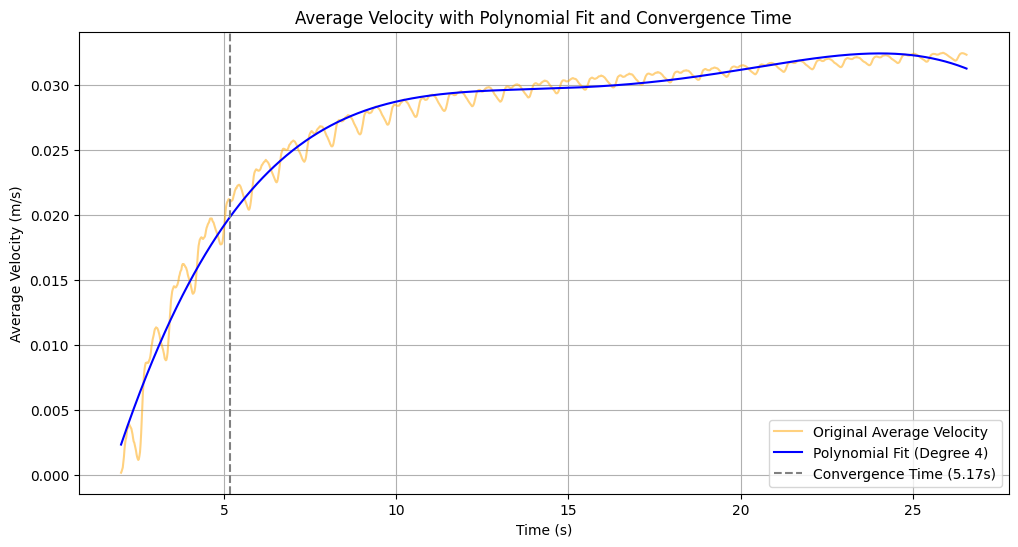

The system reaches 1 - 1/e of the maximum average velocity (0.0198 m/s) at t = 5.17 seconds.
The coasting # is: 4.27


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60, start_time=2, end_time=30, poly_degree=3):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # Crop the data based on the start and end times
    start_index = int(start_time * fps)
    end_index = int(end_time * fps)
    time = time[start_index:end_index]
    mean_x_position = mean_x_position[start_index:end_index]
    mean_y_position = mean_y_position[start_index:end_index]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # Polynomial fit to the average velocity
    poly_coeffs = np.polyfit(time[1:], average_velocity, poly_degree)
    poly_fit = np.polyval(poly_coeffs, time[1:])

    # Calculate the 1 - 1/e value of the maximum average velocity
    max_velocity = poly_fit[-1]  # Value at the last time point of the polynomial fit
    threshold_velocity = (1 - 1/np.e) * max_velocity  # Approximately 0.632 * max_velocity

    # Find the time where the polynomial fit meets this threshold
    threshold_index = np.where(poly_fit >= threshold_velocity)[0][0]
    convergence_time = time[1:][threshold_index]
    
    #
    temp_freq = 1.21
    coasting_num = convergence_time/temp_freq

    # --- Plot Original, Polynomial Fit, and Threshold ---
    plt.figure(figsize=(12, 6))
    plt.plot(time[1:], average_velocity, label='Original Average Velocity', color='orange', alpha=0.5)
    plt.plot(time[1:], poly_fit, label=f'Polynomial Fit (Degree {poly_degree})', color='blue')
    plt.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Average Velocity (m/s)')
    plt.title('Average Velocity with Polynomial Fit and Convergence Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'The system reaches 1 - 1/e of the maximum average velocity ({threshold_velocity:.4f} m/s) at t = {convergence_time:.2f} seconds.')
    print(f'The coasting # is: {coasting_num:.2f}')

# Path to the CSV file
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/24cm_run8.csv'

# Run the function with polynomial fit
analyze_and_plot(file_path, poly_degree=4)


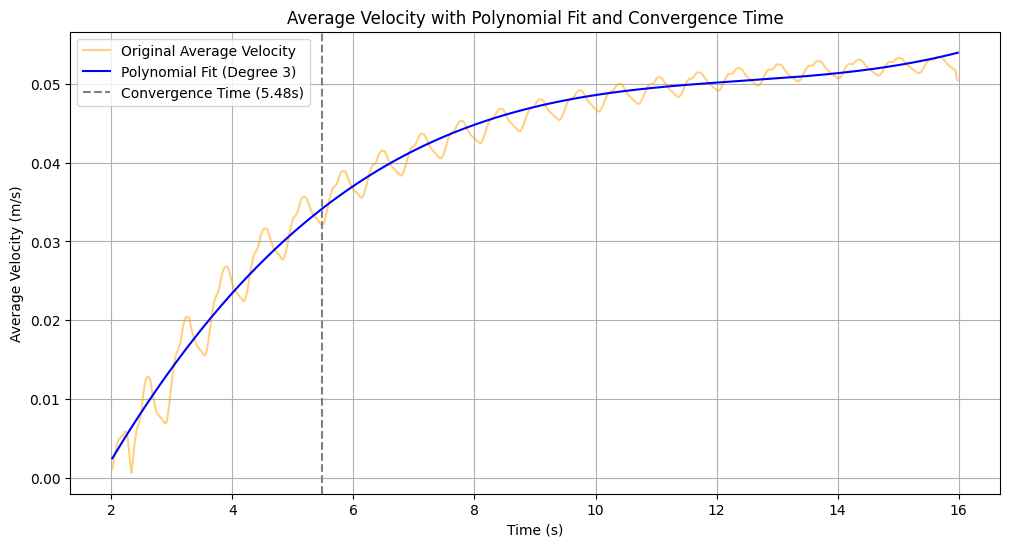

The system reaches 1 - 1/e of the maximum average velocity (0.0341 m/s) at t = 5.48 seconds.
The coasting # is: 4.53


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60, start_time=2, end_time=16, poly_degree=3):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # Crop the data based on the start and end times
    start_index = int(start_time * fps)
    end_index = int(end_time * fps)
    time = time[start_index:end_index]
    mean_x_position = mean_x_position[start_index:end_index]
    mean_y_position = mean_y_position[start_index:end_index]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # Polynomial fit to the average velocity
    poly_coeffs = np.polyfit(time[1:], average_velocity, poly_degree)
    poly_fit = np.polyval(poly_coeffs, time[1:])

    # Calculate the 1 - 1/e value of the maximum average velocity
    max_velocity = poly_fit[-1]  # Value at the last time point of the polynomial fit
    threshold_velocity = (1 - 1/np.e) * max_velocity  # Approximately 0.632 * max_velocity

    # Find the time where the polynomial fit meets this threshold
    threshold_index = np.where(poly_fit >= threshold_velocity)[0][0]
    convergence_time = time[1:][threshold_index]
    #
    temp_freq = 1.21
    coasting_num = convergence_time/temp_freq


    # --- Plot Original, Polynomial Fit, and Threshold ---
    plt.figure(figsize=(12, 6))
    plt.plot(time[1:], average_velocity, label='Original Average Velocity', color='orange', alpha=0.5)
    plt.plot(time[1:], poly_fit, label=f'Polynomial Fit (Degree {poly_degree})', color='blue')
    plt.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Average Velocity (m/s)')
    plt.title('Average Velocity with Polynomial Fit and Convergence Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'The system reaches 1 - 1/e of the maximum average velocity ({threshold_velocity:.4f} m/s) at t = {convergence_time:.2f} seconds.')
    print(f'The coasting # is: {coasting_num:.2f}')

# Path to the CSV file
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/32cm_run9.csv'

# Run the function with polynomial fit
analyze_and_plot(file_path, poly_degree=3)



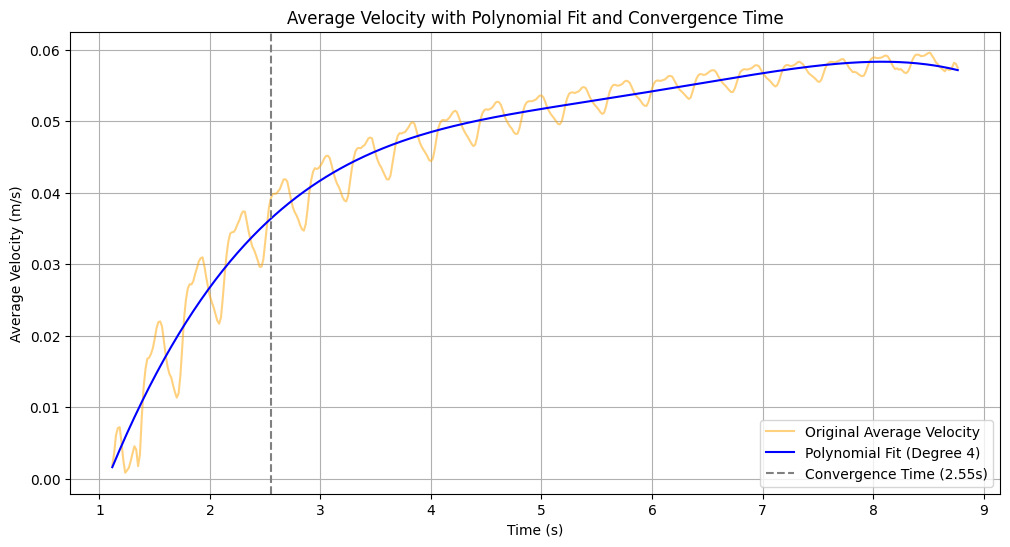

The system reaches 1 - 1/e of the maximum average velocity (0.0361 m/s) at t = 2.55 seconds.
The coasting # is: 2.11


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60, start_time=1.1, end_time=20, poly_degree=3):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # Crop the data based on the start and end times
    start_index = int(start_time * fps)
    end_index = int(end_time * fps)
    time = time[start_index:end_index]
    mean_x_position = mean_x_position[start_index:end_index]
    mean_y_position = mean_y_position[start_index:end_index]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # Polynomial fit to the average velocity
    poly_coeffs = np.polyfit(time[1:], average_velocity, poly_degree)
    poly_fit = np.polyval(poly_coeffs, time[1:])

    # Calculate the 1 - 1/e value of the maximum average velocity
    max_velocity = poly_fit[-1]  # Value at the last time point of the polynomial fit
    threshold_velocity = (1 - 1/np.e) * max_velocity  # Approximately 0.632 * max_velocity

    # Find the time where the polynomial fit meets this threshold
    threshold_index = np.where(poly_fit >= threshold_velocity)[0][0]
    convergence_time = time[1:][threshold_index]
    #
    temp_freq = 1.21
    coasting_num = convergence_time/temp_freq


    # --- Plot Original, Polynomial Fit, and Threshold ---
    plt.figure(figsize=(12, 6))
    plt.plot(time[1:], average_velocity, label='Original Average Velocity', color='orange', alpha=0.5)
    plt.plot(time[1:], poly_fit, label=f'Polynomial Fit (Degree {poly_degree})', color='blue')
    plt.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Average Velocity (m/s)')
    plt.title('Average Velocity with Polynomial Fit and Convergence Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'The system reaches 1 - 1/e of the maximum average velocity ({threshold_velocity:.4f} m/s) at t = {convergence_time:.2f} seconds.')
    print(f'The coasting # is: {coasting_num:.2f}')

# Path to the CSV file
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/40cm_run3.csv'

# Run the function with polynomial fit
analyze_and_plot(file_path, poly_degree=4)



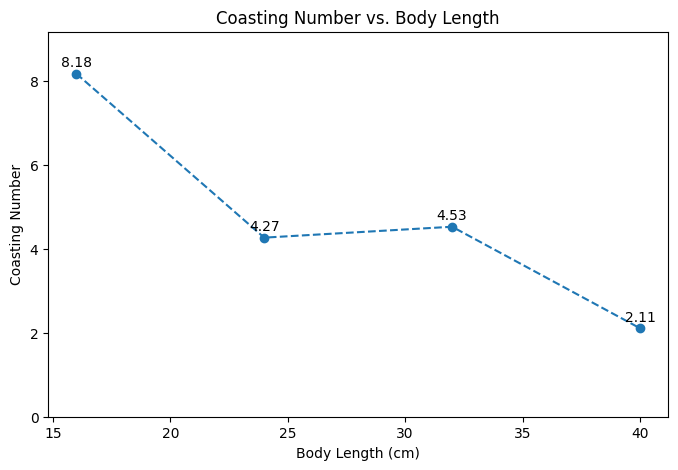

In [138]:
import matplotlib.pyplot as plt

# Data for plotting
body_length = [16, 24, 32, 40]  # in cm
coasting_number = [8.18, 4.27, 4.53, 2.11]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(body_length, coasting_number, marker='o', linestyle='--')  # Dashed line style
plt.title("Coasting Number vs. Body Length")
plt.xlabel("Body Length (cm)")
plt.ylabel("Coasting Number")
plt.ylim(0, max(coasting_number) + 1)  # Start y-axis from zero

# Adding data labels
for i, txt in enumerate(coasting_number):
    plt.annotate(f"{txt}", (body_length[i], coasting_number[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()


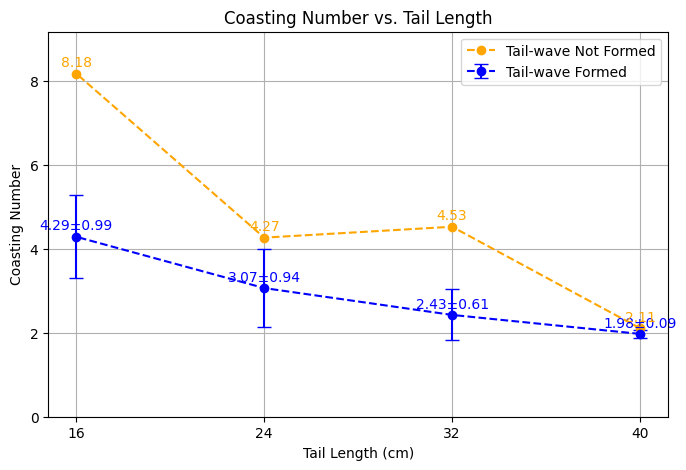

In [168]:
import matplotlib.pyplot as plt
import numpy as np

# Data for tail length, individual measurements, and averages
tail_lengths = np.array([40, 32, 24, 16])
measurements = np.array([
    [1.91, 3.42, 3.6, 5.49],
    [1.98, 1.85, 4.02, 3.82],
    [2.12, 2.03, 3.11, 4.93],
    [1.89, 2.41, 1.54, 2.92]
])
averages = np.array([1.975, 2.4275, 3.0675, 4.29])
std_devs = measurements.std(axis=0)  # Standard deviation for error bars

# Data for the new curve (tail-wave not formed)
coasting_number_tail_wave_not_formed = np.array([2.11, 4.53, 4.27, 8.18])

# Plot with consistent style
plt.figure(figsize=(8, 5))

# Plot tail-wave formed (with error bars)
plt.errorbar(tail_lengths, averages, yerr=std_devs, fmt='o', linestyle='--', capsize=5, label='Tail-wave Formed', color='blue')

# Plot tail-wave not formed
plt.plot(tail_lengths, coasting_number_tail_wave_not_formed, marker='o', linestyle='--', label='Tail-wave Not Formed', color='orange')

# Title, labels, and legend
plt.title("Coasting Number vs. Tail Length")
plt.xlabel("Tail Length (cm)")
plt.ylabel("Coasting Number")
plt.xticks(tail_lengths)  # Ensure tail lengths are used as ticks
plt.ylim(0, max(coasting_number_tail_wave_not_formed.max(), averages.max()) + 1)  # Adjust y-axis
plt.grid(True)
plt.legend()

# Adding data labels for both curves
for i, avg in enumerate(averages):
    plt.annotate(f"{avg:.2f}±{std_devs[i]:.2f}", (tail_lengths[i], averages[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, val in enumerate(coasting_number_tail_wave_not_formed):
    plt.annotate(f"{val:.2f}", (tail_lengths[i], coasting_number_tail_wave_not_formed[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()


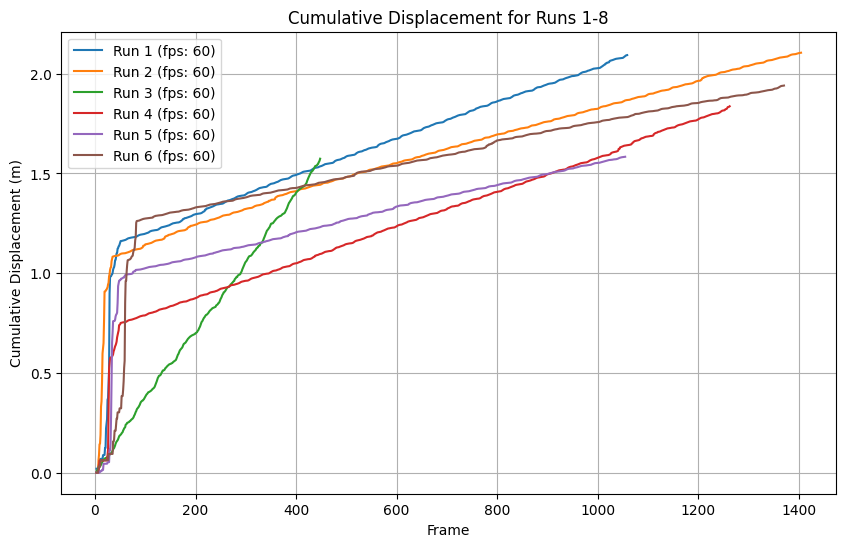

In [139]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate total displacement from a CSV file
def calculate_total_displacement(file_path, fps, x_length_meters=0.5625, y_length_meters=1):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors (Adjust as per your dataset)
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers
    columns = df.iloc[1].tolist()  # Get the header row
    coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

    # Extract relevant x, y coordinates into a new dataframe, skipping the first two rows
    coordinates_df = df.iloc[2:, coordinate_columns[:44]].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate displacement between frames (difference between consecutive frames)
    displacement_x = x_coords.diff().mean(axis=1)  # Mean x displacement across markers
    displacement_y = y_coords.diff().mean(axis=1)  # Mean y displacement across markers

    # Calculate total displacement
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)

    # Calculate cumulative displacement over time
    cumulative_displacement = total_displacement.cumsum()

    return cumulative_displacement

# List of file paths for runs 1 to 8 and corresponding fps
file_paths = [
    ('/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/40cm/40cm_run2DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv', 60),
    ('/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/40cm/40cm_run3DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv', 60),
    ('/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/40cm/40cm_run4DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv', 60),
    # ('/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/40cm/40cm_run10DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv', 60),
    # ('/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/40cm/40cm_run6DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv', 60),
    ('/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/40cm/40cm_run7DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv', 60),
    ('/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/40cm/40cm_run8DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv', 60),
    ('/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/40cm/40cm_run9DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv', 60)
]

# Calculate the cumulative displacements for each run with the appropriate fps
cumulative_displacements = [calculate_total_displacement(file_path, fps) for file_path, fps in file_paths]

# Plotting the displacements for each run
plt.figure(figsize=(10, 6))

for i, displacement in enumerate(cumulative_displacements):
    plt.plot(displacement, label=f'Run {i + 1} (fps: {file_paths[i][1]})')

plt.title('Cumulative Displacement for Runs 1-8')
plt.xlabel('Frame')
plt.ylabel('Cumulative Displacement (m)')
plt.grid(True)
plt.legend()
plt.show()



Analyzing Run 2...



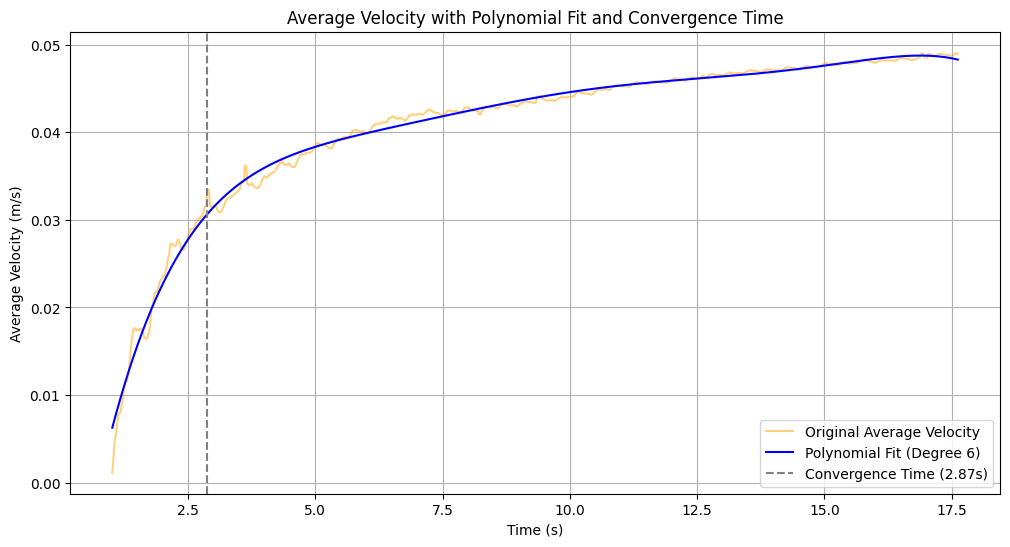

The system reaches 1 - 1/e of the maximum average velocity (0.0305 m/s) at t = 2.87 seconds.
The coasting # is: 2.37

Analyzing Run 3...



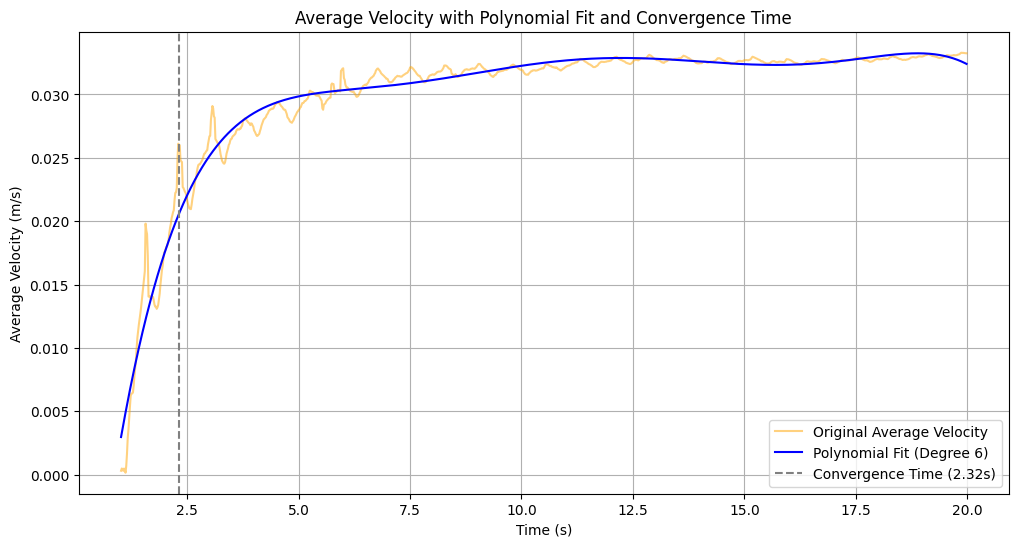

The system reaches 1 - 1/e of the maximum average velocity (0.0205 m/s) at t = 2.32 seconds.
The coasting # is: 1.91

Analyzing Run 4...



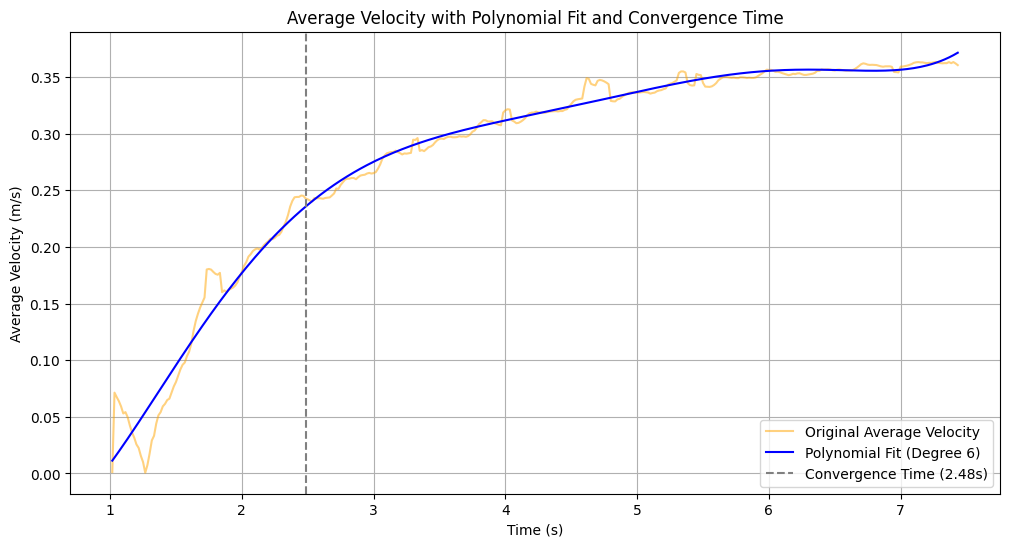

The system reaches 1 - 1/e of the maximum average velocity (0.2348 m/s) at t = 2.48 seconds.
The coasting # is: 2.05

Analyzing Run 5...



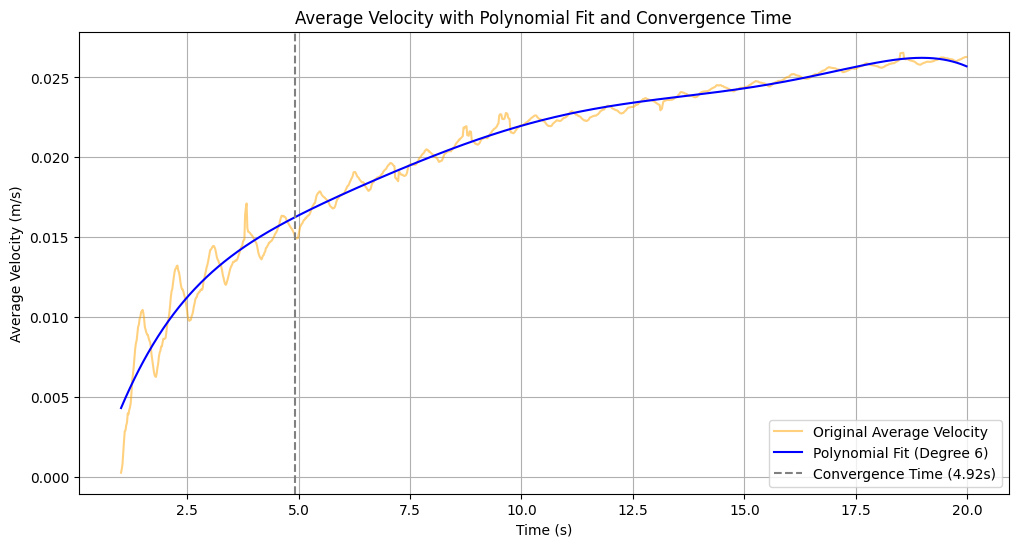

The system reaches 1 - 1/e of the maximum average velocity (0.0162 m/s) at t = 4.92 seconds.
The coasting # is: 4.06

Analyzing Run 6...



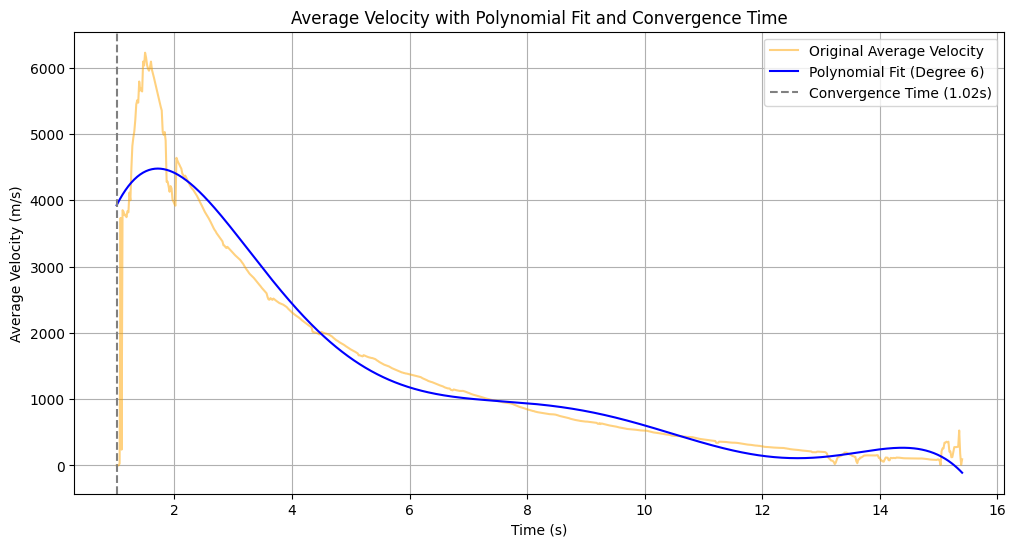

The system reaches 1 - 1/e of the maximum average velocity (-69.8012 m/s) at t = 1.02 seconds.
The coasting # is: 0.84

Analyzing Run 7...



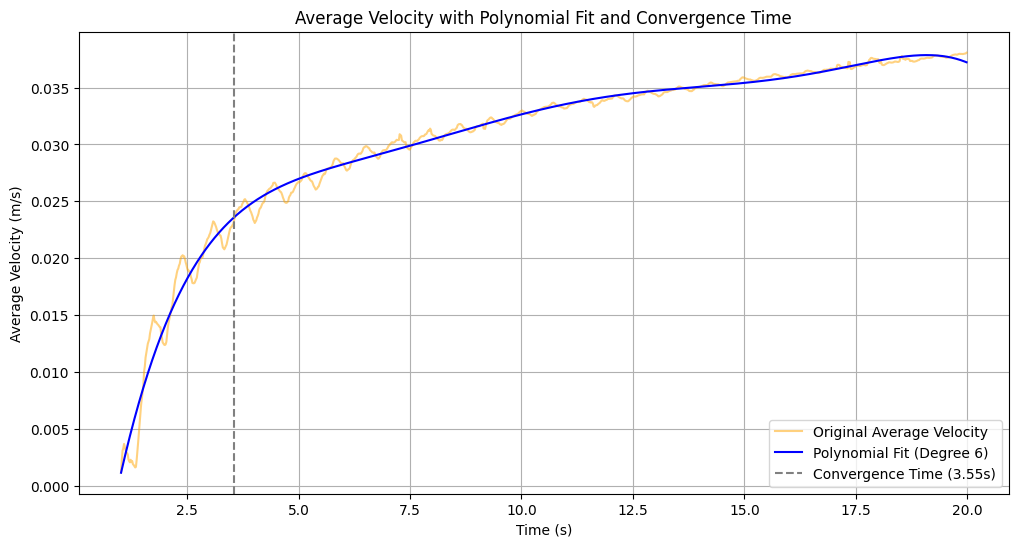

The system reaches 1 - 1/e of the maximum average velocity (0.0235 m/s) at t = 3.55 seconds.
The coasting # is: 2.93

Analyzing Run 8...



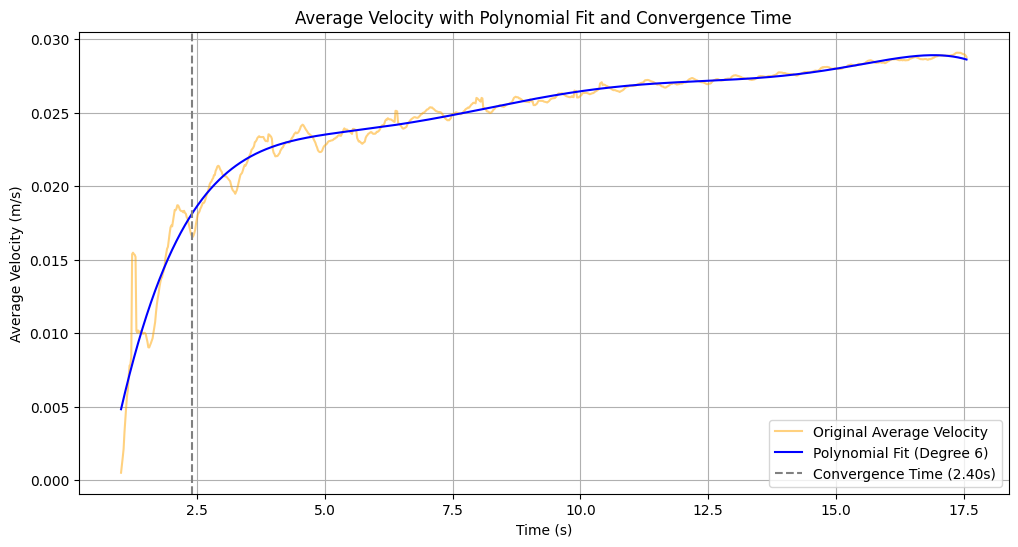

The system reaches 1 - 1/e of the maximum average velocity (0.0181 m/s) at t = 2.40 seconds.
The coasting # is: 1.98

Analyzing Run 9...



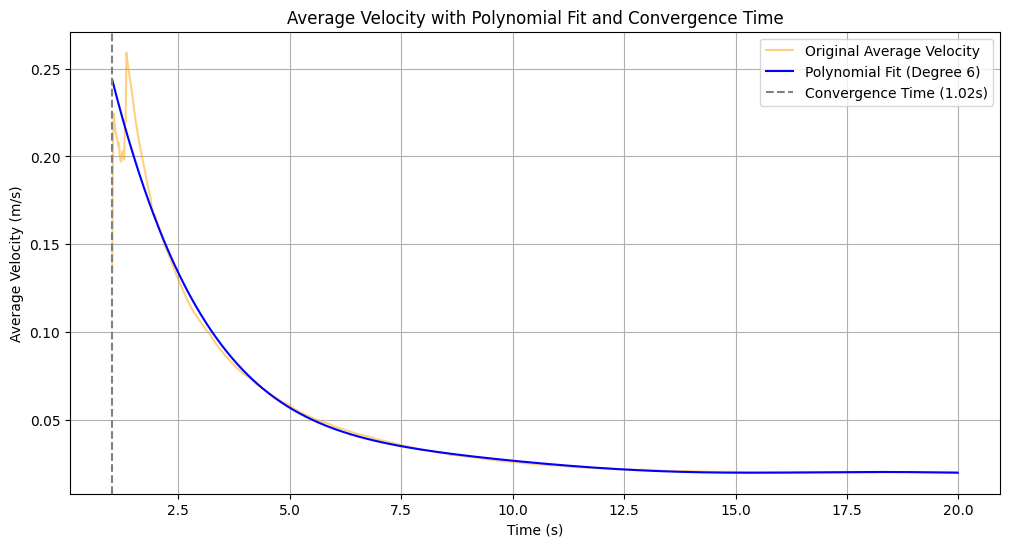

The system reaches 1 - 1/e of the maximum average velocity (0.0124 m/s) at t = 1.02 seconds.
The coasting # is: 0.84

Analyzing Run 10...



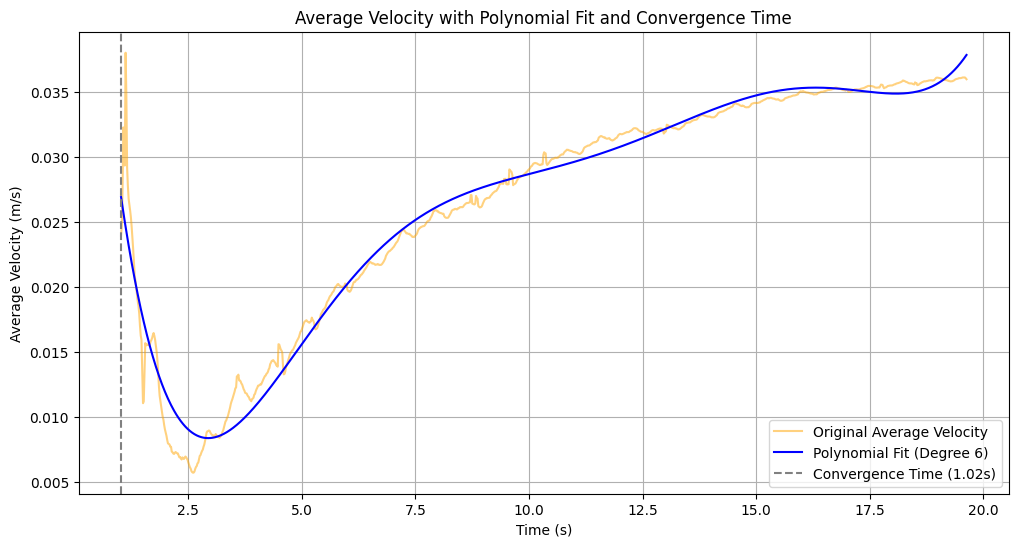

The system reaches 1 - 1/e of the maximum average velocity (0.0239 m/s) at t = 1.02 seconds.
The coasting # is: 0.84

Analyzing Run 11...



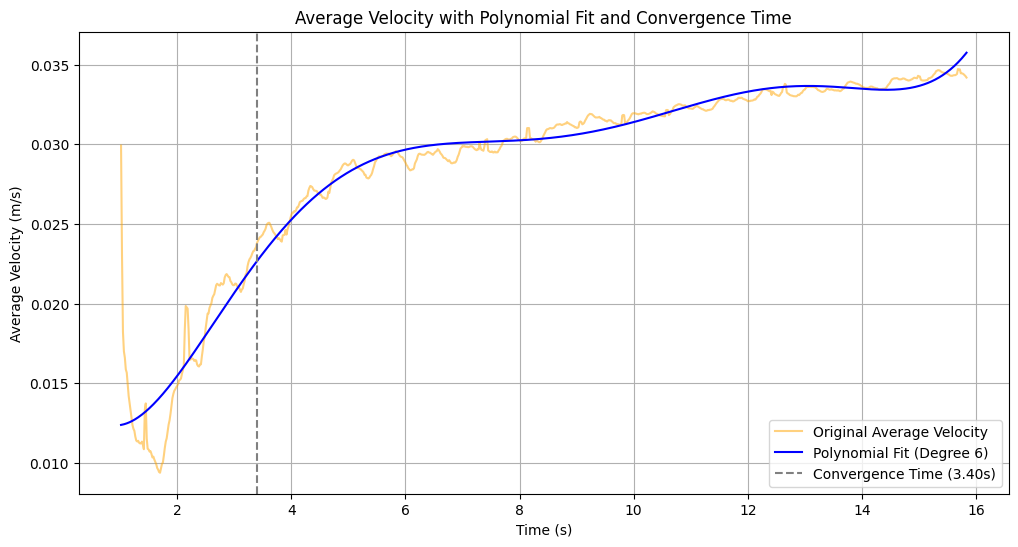

The system reaches 1 - 1/e of the maximum average velocity (0.0226 m/s) at t = 3.40 seconds.
The coasting # is: 2.81

Analyzing Run 12...



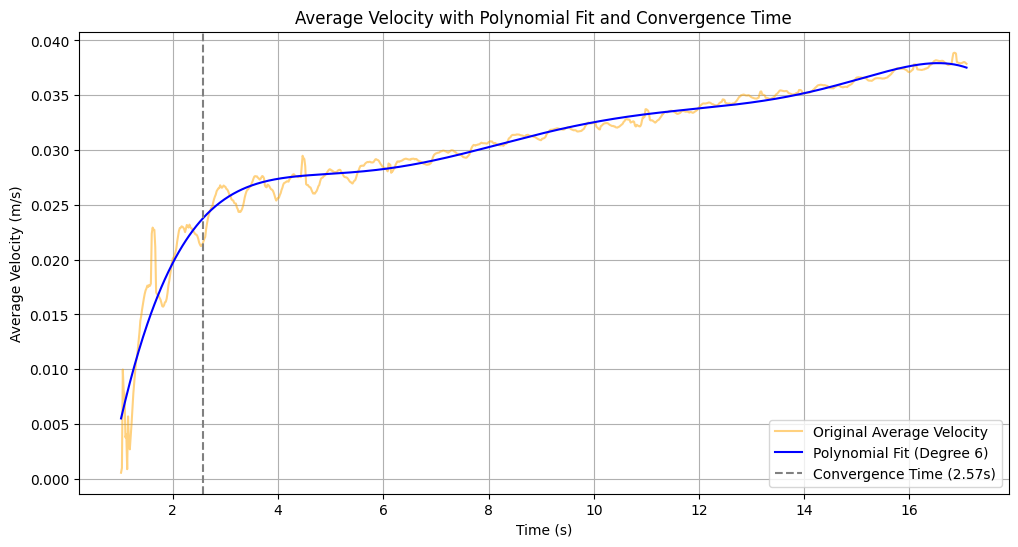

The system reaches 1 - 1/e of the maximum average velocity (0.0237 m/s) at t = 2.57 seconds.
The coasting # is: 2.12

Analyzing Run 13...



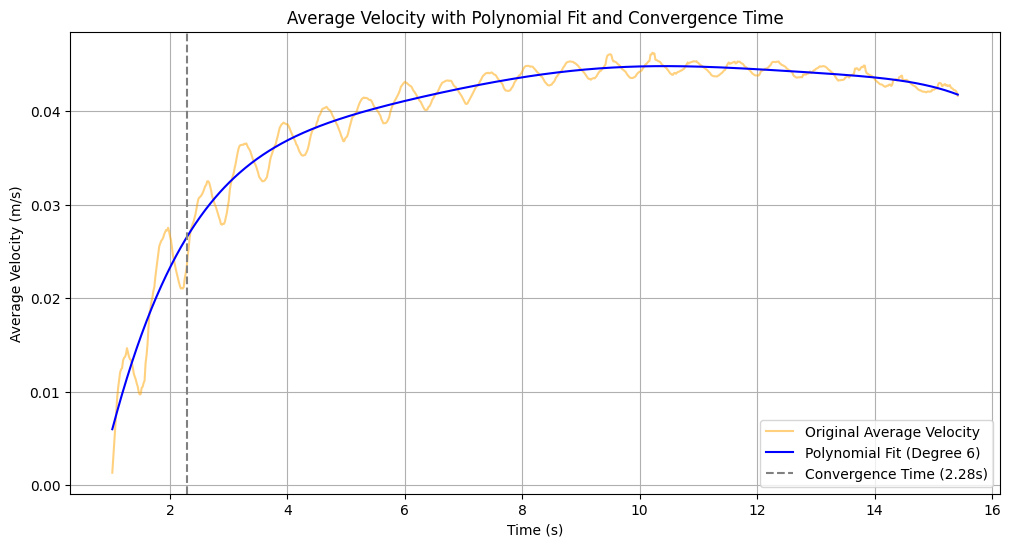

The system reaches 1 - 1/e of the maximum average velocity (0.0264 m/s) at t = 2.28 seconds.
The coasting # is: 1.89


In [140]:


def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60, start_time=1.0, end_time=35, poly_degree=2):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # Crop the data based on the start and end times
    start_index = int(start_time * fps)
    end_index = int(end_time * fps)
    time = time[start_index:end_index]
    mean_x_position = mean_x_position[start_index:end_index]
    mean_y_position = mean_y_position[start_index:end_index]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # Polynomial fit to the average velocity
    poly_coeffs = np.polyfit(time[1:], average_velocity, poly_degree)
    poly_fit = np.polyval(poly_coeffs, time[1:])

    # Calculate the 1 - 1/e value of the maximum average velocity
    max_velocity = poly_fit[-1]  # Value at the last time point of the polynomial fit
    threshold_velocity = (1 - 1/np.e) * max_velocity  # Approximately 0.632 * max_velocity

    # Find the time where the polynomial fit meets this threshold
    threshold_index = np.where(poly_fit >= threshold_velocity)[0][0]
    convergence_time = time[1:][threshold_index]

    temp_freq = 1.21
    coasting_num = convergence_time / temp_freq

    # --- Plot Original, Polynomial Fit, and Threshold ---
    plt.figure(figsize=(12, 6))
    plt.plot(time[1:], average_velocity, label='Original Average Velocity', color='orange', alpha=0.5)
    plt.plot(time[1:], poly_fit, label=f'Polynomial Fit (Degree {poly_degree})', color='blue')
    plt.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Average Velocity (m/s)')
    plt.title('Average Velocity with Polynomial Fit and Convergence Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'The system reaches 1 - 1/e of the maximum average velocity ({threshold_velocity:.4f} m/s) at t = {convergence_time:.2f} seconds.')
    print(f'The coasting # is: {coasting_num:.2f}')

def analyze_multiple_runs(base_path, runs, x_length_meters=2, y_length_meters=2, fps=60, start_time=1, end_time=20, poly_degree=5):
    for run in runs:
        file_path = os.path.join(base_path, f"40cm_run{run}DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv")
        print(f"\nAnalyzing Run {run}...\n")
        analyze_and_plot(file_path, x_length_meters, y_length_meters, fps, start_time, end_time, poly_degree)

# Base path and runs to analyze
base_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/40cm'
runs = range(2, 14)  # Run 2 to 13

# Analyze the runs
analyze_multiple_runs(base_path, runs, poly_degree=6)


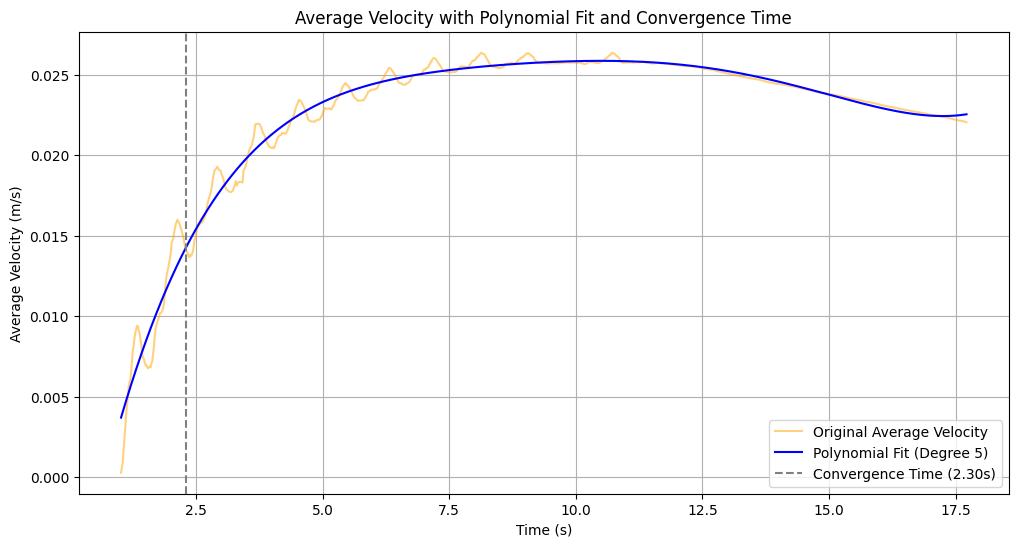

The system reaches 1 - 1/e of the maximum average velocity (0.0143 m/s) at t = 2.30 seconds.
The coasting # is: 1.90


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60, start_time=1, end_time=35, poly_degree=2):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # Crop the data based on the start and end times
    start_index = int(start_time * fps)
    end_index = int(end_time * fps)
    time = time[start_index:end_index]
    mean_x_position = mean_x_position[start_index:end_index]
    mean_y_position = mean_y_position[start_index:end_index]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # Polynomial fit to the average velocity
    poly_coeffs = np.polyfit(time[1:], average_velocity, poly_degree)
    poly_fit = np.polyval(poly_coeffs, time[1:])

    # Calculate the 1 - 1/e value of the maximum average velocity
    max_velocity = poly_fit[-1]  # Value at the last time point of the polynomial fit
    threshold_velocity = (1 - 1/np.e) * max_velocity  # Approximately 0.632 * max_velocity

    # Find the time where the polynomial fit meets this threshold
    threshold_index = np.where(poly_fit >= threshold_velocity)[0][0]
    convergence_time = time[1:][threshold_index]

    #
    temp_freq = 1.21
    coasting_num = convergence_time/temp_freq


    # --- Plot Original, Polynomial Fit, and Threshold ---
    plt.figure(figsize=(12, 6))
    plt.plot(time[1:], average_velocity, label='Original Average Velocity', color='orange', alpha=0.5)
    plt.plot(time[1:], poly_fit, label=f'Polynomial Fit (Degree {poly_degree})', color='blue')
    plt.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Average Velocity (m/s)')
    plt.title('Average Velocity with Polynomial Fit and Convergence Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'The system reaches 1 - 1/e of the maximum average velocity ({threshold_velocity:.4f} m/s) at t = {convergence_time:.2f} seconds.')
    print(f'The coasting # is: {coasting_num:.2f}')

# Path to the CSV file
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/40cm/coasting_40cm_run1DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv'

# Run the function with polynomial fit
analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60, poly_degree=5)



Analyzing Run 2...



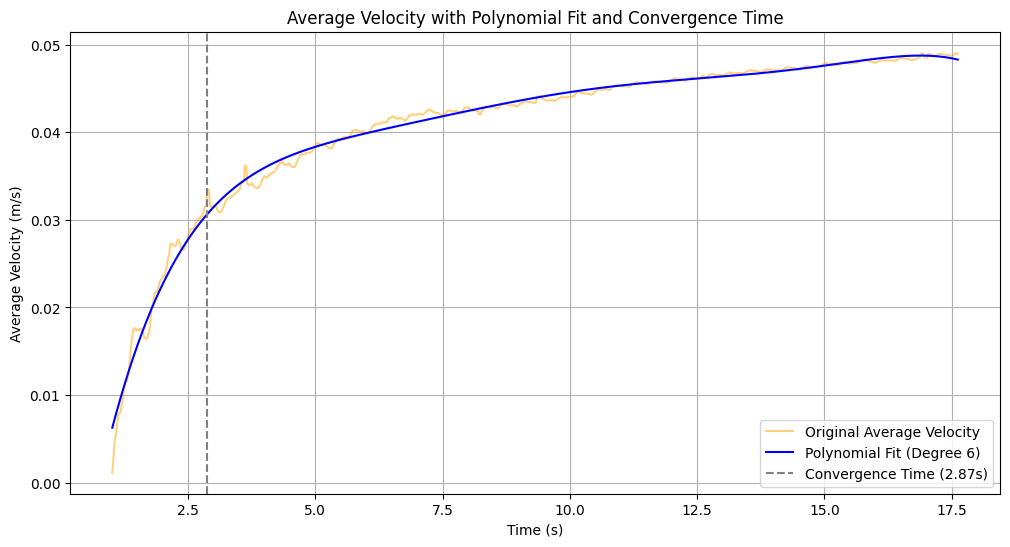

The system reaches 1 - 1/e of the maximum average velocity (0.0305 m/s) at t = 2.87 seconds.
The coasting # is: 2.37

Analyzing Run 3...



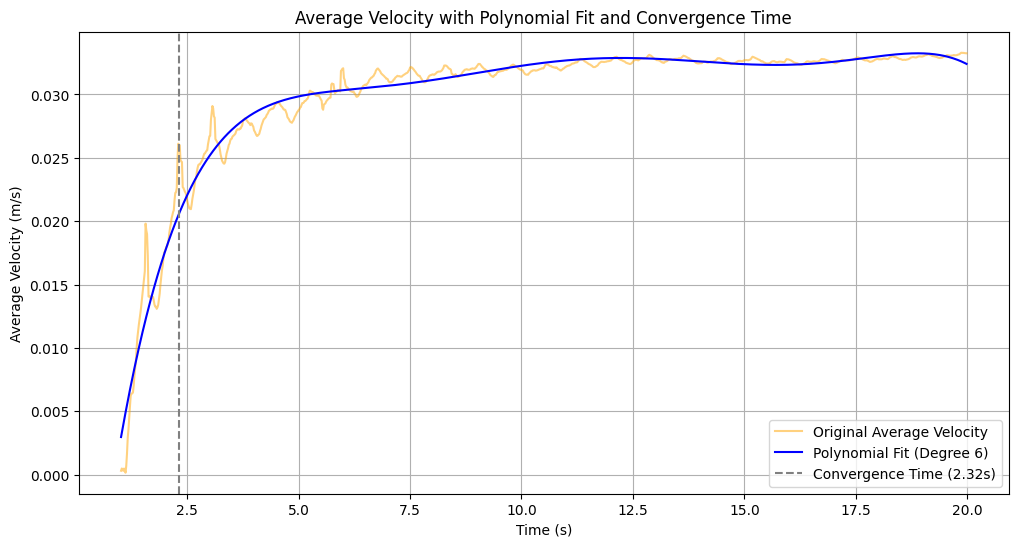

The system reaches 1 - 1/e of the maximum average velocity (0.0205 m/s) at t = 2.32 seconds.
The coasting # is: 1.91

Analyzing Run 4...



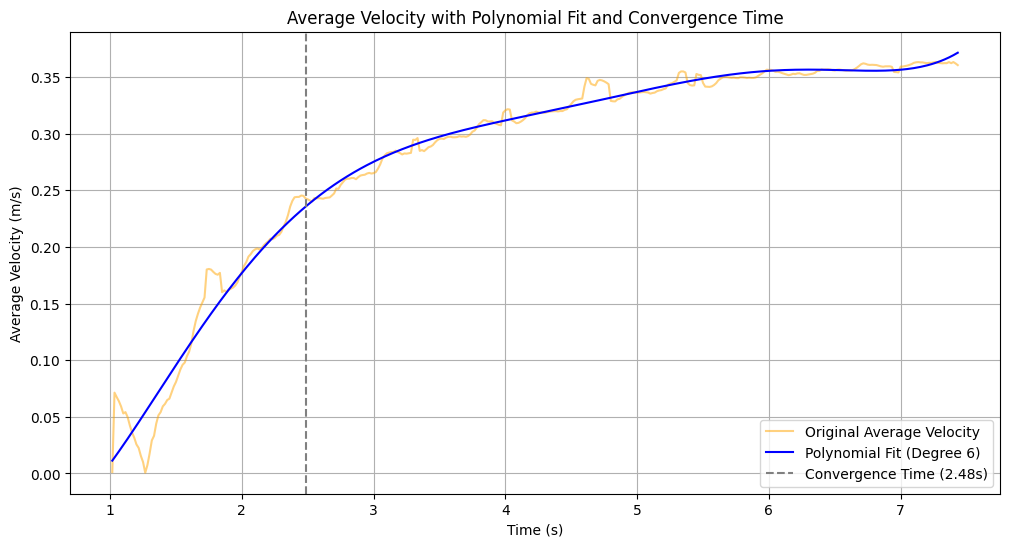

The system reaches 1 - 1/e of the maximum average velocity (0.2348 m/s) at t = 2.48 seconds.
The coasting # is: 2.05

Analyzing Run 5...



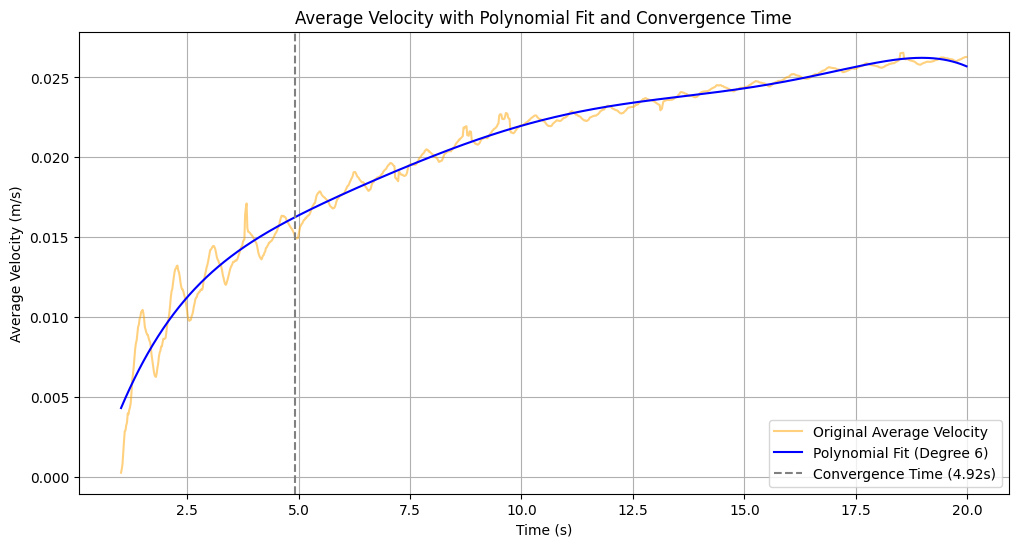

The system reaches 1 - 1/e of the maximum average velocity (0.0162 m/s) at t = 4.92 seconds.
The coasting # is: 4.06

Analyzing Run 6...



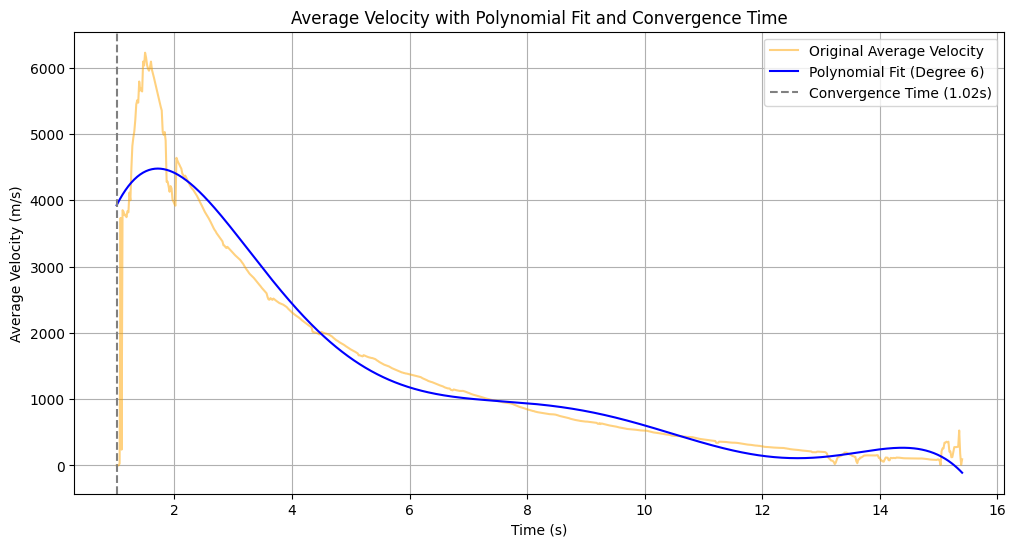

The system reaches 1 - 1/e of the maximum average velocity (-69.8012 m/s) at t = 1.02 seconds.
The coasting # is: 0.84

Analyzing Run 7...



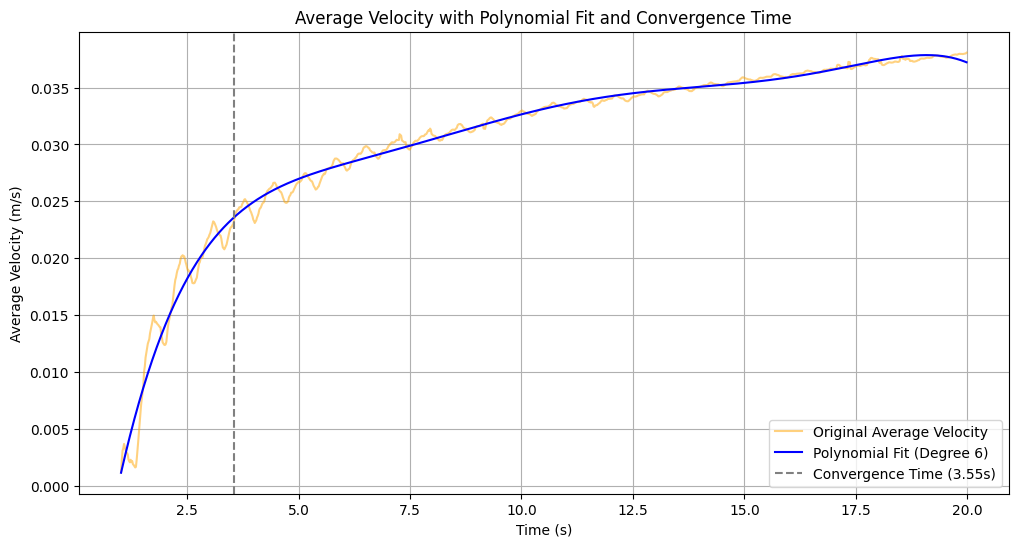

The system reaches 1 - 1/e of the maximum average velocity (0.0235 m/s) at t = 3.55 seconds.
The coasting # is: 2.93

Analyzing Run 8...



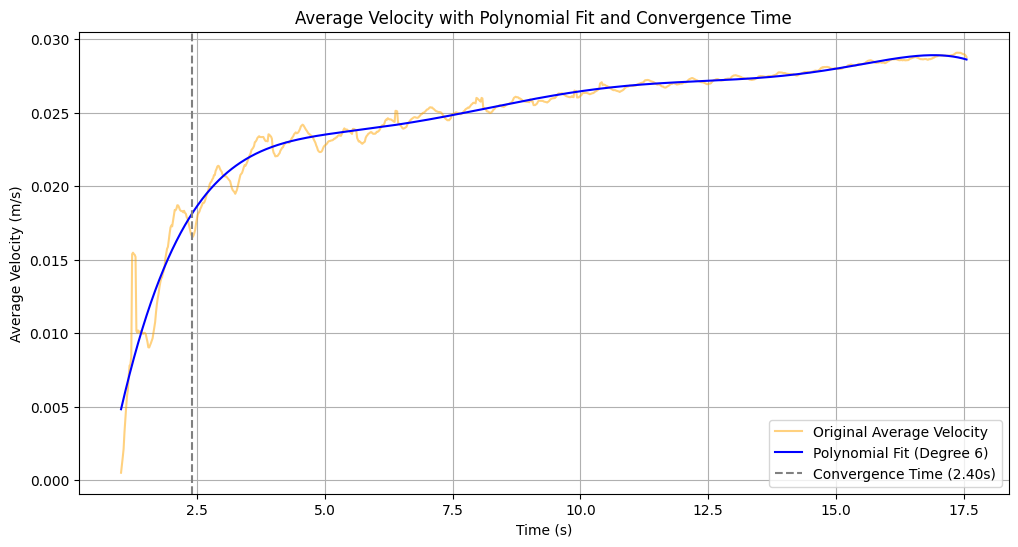

The system reaches 1 - 1/e of the maximum average velocity (0.0181 m/s) at t = 2.40 seconds.
The coasting # is: 1.98

Analyzing Run 9...



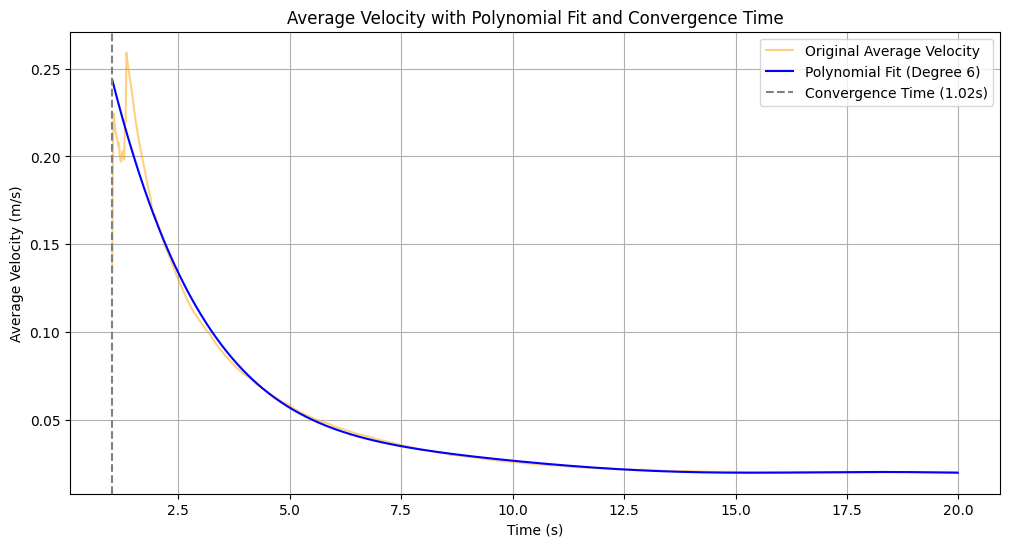

The system reaches 1 - 1/e of the maximum average velocity (0.0124 m/s) at t = 1.02 seconds.
The coasting # is: 0.84

Analyzing Run 10...



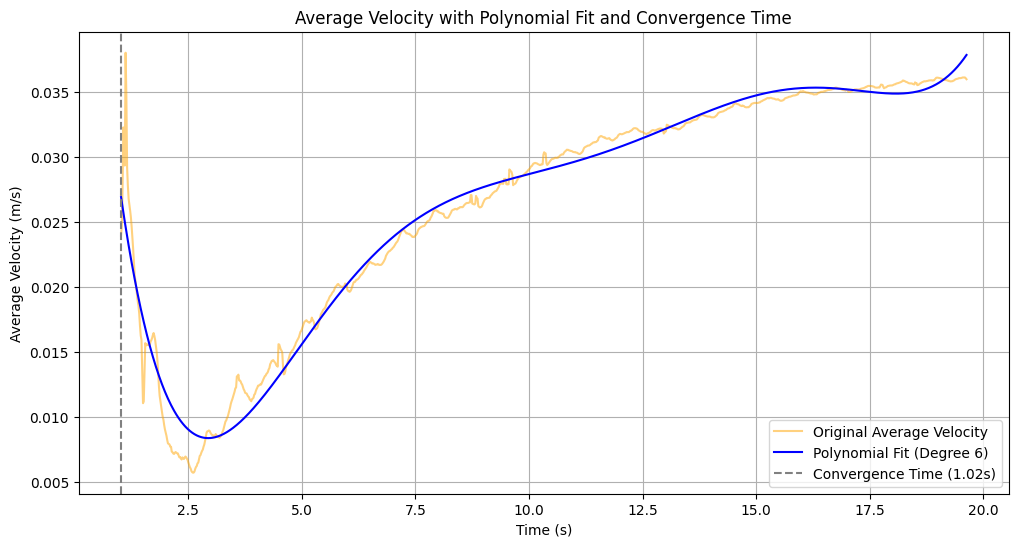

The system reaches 1 - 1/e of the maximum average velocity (0.0239 m/s) at t = 1.02 seconds.
The coasting # is: 0.84

Analyzing Run 11...



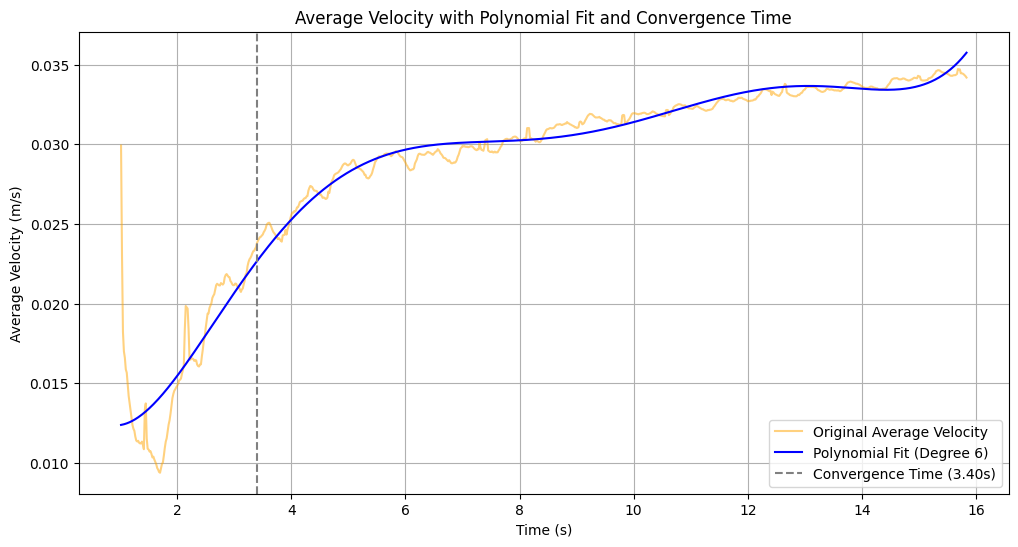

The system reaches 1 - 1/e of the maximum average velocity (0.0226 m/s) at t = 3.40 seconds.
The coasting # is: 2.81

Analyzing Run 12...



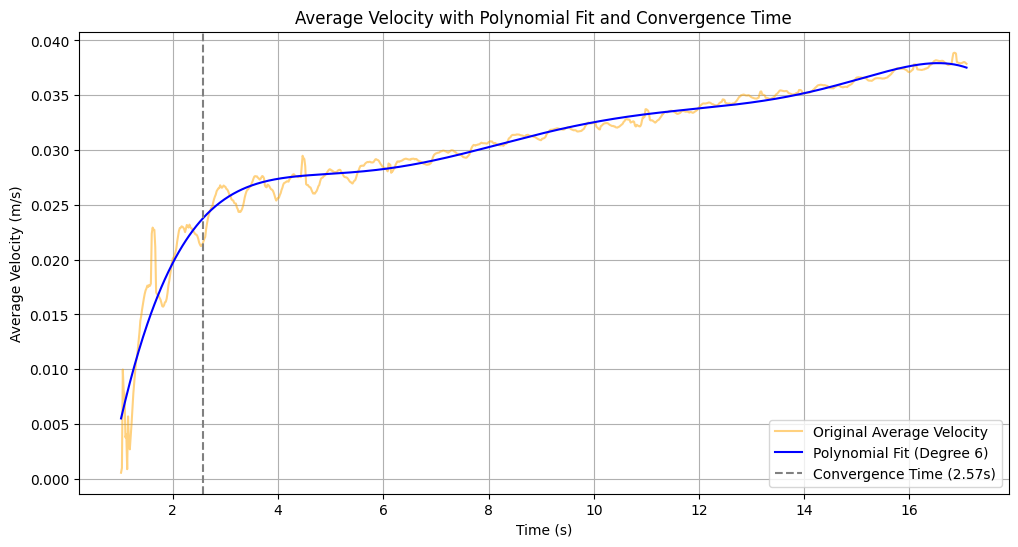

The system reaches 1 - 1/e of the maximum average velocity (0.0237 m/s) at t = 2.57 seconds.
The coasting # is: 2.12

Analyzing Run 13...



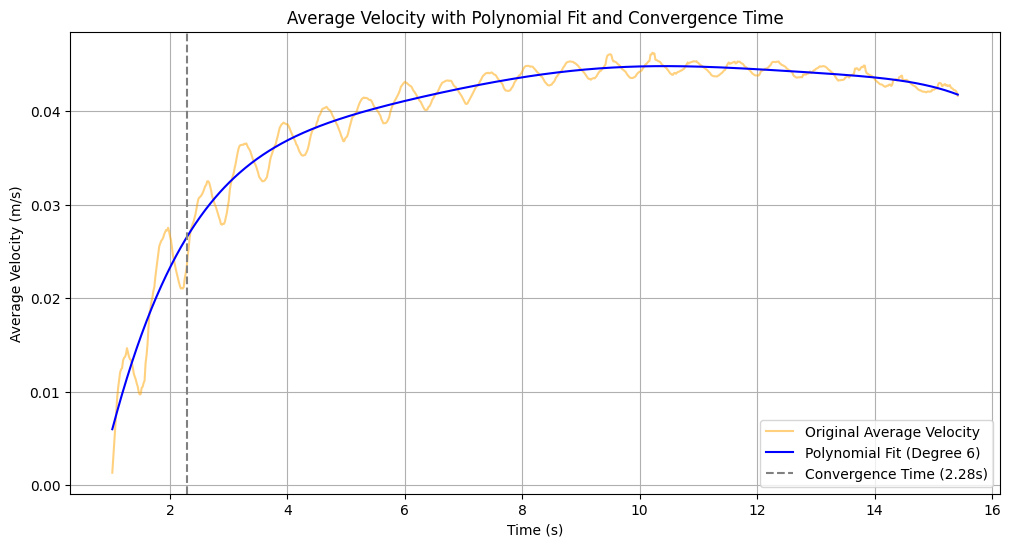

The system reaches 1 - 1/e of the maximum average velocity (0.0264 m/s) at t = 2.28 seconds.
The coasting # is: 1.89


In [146]:


def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60, start_time=1.0, end_time=35, poly_degree=2):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # Crop the data based on the start and end times
    start_index = int(start_time * fps)
    end_index = int(end_time * fps)
    time = time[start_index:end_index]
    mean_x_position = mean_x_position[start_index:end_index]
    mean_y_position = mean_y_position[start_index:end_index]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # Polynomial fit to the average velocity
    poly_coeffs = np.polyfit(time[1:], average_velocity, poly_degree)
    poly_fit = np.polyval(poly_coeffs, time[1:])

    # Calculate the 1 - 1/e value of the maximum average velocity
    max_velocity = poly_fit[-1]  # Value at the last time point of the polynomial fit
    threshold_velocity = (1 - 1/np.e) * max_velocity  # Approximately 0.632 * max_velocity

    # Find the time where the polynomial fit meets this threshold
    threshold_index = np.where(poly_fit >= threshold_velocity)[0][0]
    convergence_time = time[1:][threshold_index]

    temp_freq = 1.21
    coasting_num = convergence_time / temp_freq

    # --- Plot Original, Polynomial Fit, and Threshold ---
    plt.figure(figsize=(12, 6))
    plt.plot(time[1:], average_velocity, label='Original Average Velocity', color='orange', alpha=0.5)
    plt.plot(time[1:], poly_fit, label=f'Polynomial Fit (Degree {poly_degree})', color='blue')
    plt.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Average Velocity (m/s)')
    plt.title('Average Velocity with Polynomial Fit and Convergence Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'The system reaches 1 - 1/e of the maximum average velocity ({threshold_velocity:.4f} m/s) at t = {convergence_time:.2f} seconds.')
    print(f'The coasting # is: {coasting_num:.2f}')

def analyze_multiple_runs(base_path, runs, x_length_meters=2, y_length_meters=2, fps=60, start_time=1, end_time=20, poly_degree=5):
    for run in runs:
        file_path = os.path.join(base_path, f"40cm_run{run}DLC_resnet50_part1Dec10shuffle1_100000_filtered.csv")
        print(f"\nAnalyzing Run {run}...\n")
        analyze_and_plot(file_path, x_length_meters, y_length_meters, fps, start_time, end_time, poly_degree)

# Base path and runs to analyze
base_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/vel_steadyState/newCoasting/40cm'

runs = range(2, 14)  # Run 2 to 13

# Analyze the runs
analyze_multiple_runs(base_path, runs, poly_degree=6)


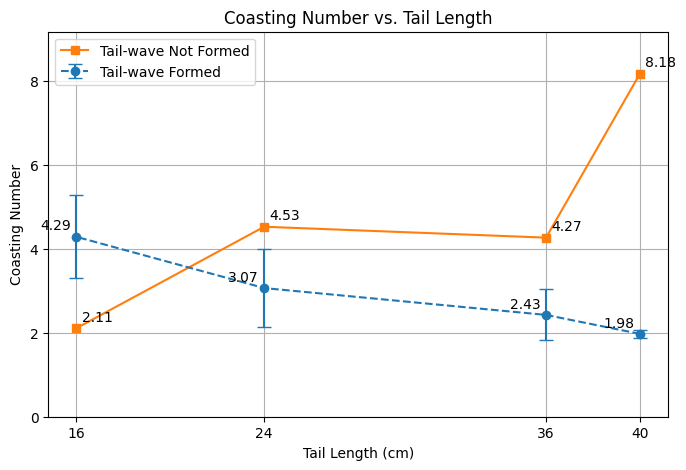

In [163]:
import matplotlib.pyplot as plt
import numpy as np

# Data for tail length, individual measurements, and averages
tail_lengths = np.array([40, 36, 24, 16])
measurements = np.array([
    [1.91, 3.42, 3.6, 5.49],
    [1.98, 1.85, 4.02, 3.82],
    [2.12, 2.03, 3.11, 4.93],
    [1.89, 2.41, 1.54, 2.92]
])
averages = np.array([1.975, 2.4275, 3.0675, 4.29])
std_devs = measurements.std(axis=0)  # Standard deviation for error bars

# Data for the new curve (tail-wave not formed)
coasting_number_tail_wave_not_formed = np.array([8.18, 4.27, 4.53, 2.11])

# Plot with default Python colors
plt.figure(figsize=(8, 5))

# Plot tail-wave formed (with error bars)
plt.errorbar(tail_lengths, averages, yerr=std_devs, fmt='o', linestyle='--', capsize=5, label='Tail-wave Formed')

# Plot tail-wave not formed
plt.plot(tail_lengths, coasting_number_tail_wave_not_formed, marker='s', linestyle='-', label='Tail-wave Not Formed')

# Title, labels, and legend
plt.title("Coasting Number vs. Tail Length")
plt.xlabel("Tail Length (cm)")
plt.ylabel("Coasting Number")
plt.xticks(tail_lengths)  # Ensure tail lengths are used as ticks
plt.ylim(0, max(coasting_number_tail_wave_not_formed.max(), averages.max()) + 1)  # Adjust y-axis
plt.grid(True)
plt.legend()

# Adding data labels for both curves
for i, avg in enumerate(averages):
    plt.annotate(f"{avg:.2f}", (tail_lengths[i], averages[i]), textcoords="offset points", xytext=(-15, 5), ha='center')

for i, val in enumerate(coasting_number_tail_wave_not_formed):
    plt.annotate(f"{val:.2f}", (tail_lengths[i], coasting_number_tail_wave_not_formed[i]), textcoords="offset points", xytext=(15, 5), ha='center')

plt.show()
